In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
trainset = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
testset = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
#build function to count caolumn that has missing value
def column_nan(missing):
    s = []
    for i in missing:
        if i > 0:
            s.append(i)
    print(len(s))
train = trainset.isnull().sum().sort_values(ascending = False)
test = testset.isnull().sum().sort_values(ascending = False)

In [4]:
print("Sum of column has Nan in trainset:")
column_nan(train)
print("Sum of column has Nan in testset:")
column_nan(test)

Sum of column has Nan in trainset:
19
Sum of column has Nan in testset:
33


In [5]:
#summing missing value trainset
trainset.isnull().sum().sort_values(ascending = False).head(20)/len(trainset)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

In [6]:
#summing percentage missing value
testset.isnull().sum().sort_values(ascending = False).head(33)/len(trainset)

PoolQC          0.997260
MiscFeature     0.964384
Alley           0.926027
Fence           0.800685
FireplaceQu     0.500000
LotFrontage     0.155479
GarageCond      0.053425
GarageQual      0.053425
GarageYrBlt     0.053425
GarageFinish    0.053425
GarageType      0.052055
BsmtCond        0.030822
BsmtQual        0.030137
BsmtExposure    0.030137
BsmtFinType1    0.028767
BsmtFinType2    0.028767
MasVnrType      0.010959
MasVnrArea      0.010274
MSZoning        0.002740
BsmtHalfBath    0.001370
Utilities       0.001370
Functional      0.001370
BsmtFullBath    0.001370
BsmtFinSF2      0.000685
BsmtFinSF1      0.000685
Exterior2nd     0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
SaleType        0.000685
Exterior1st     0.000685
KitchenQual     0.000685
GarageArea      0.000685
GarageCars      0.000685
dtype: float64

In [7]:
#clean columns 'PoolQC','MiscFeature','Alley','Fence' because columns has missing values more than 80%
cleaning_train = trainset.drop(['PoolQC','MiscFeature','Alley','Fence'], axis= 1)
cleaning_test = testset.drop(['PoolQC','MiscFeature','Alley','Fence'], axis= 1)

In [8]:
#cleaning trainig_set
s = cleaning_train.isnull().sum(axis=0).reset_index().sort_values(0,ascending=False).head(15)
s.columns = ['variable','missing']
col_miss_train = s['variable'].tolist()
miss = cleaning_train[col_miss_train]
miss.describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


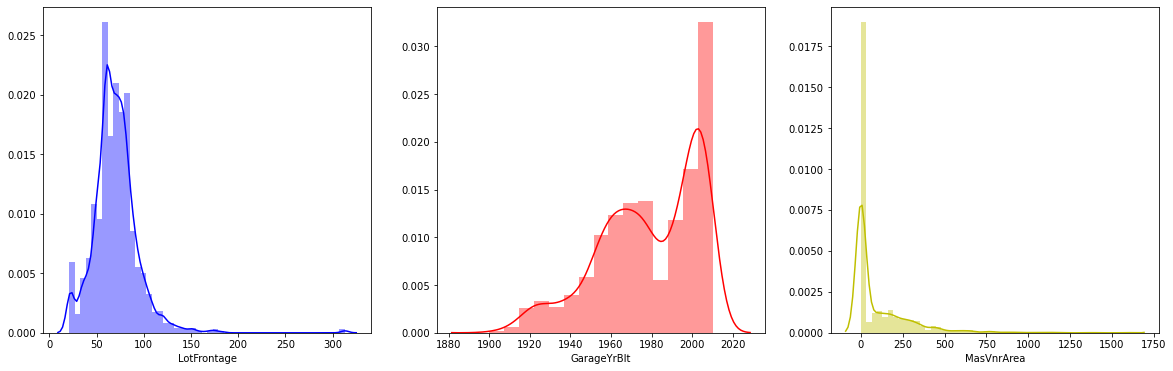

In [9]:
# see distribution
fig,axes = plt.subplots(1,3, figsize = (20,6))
sns.distplot(miss['LotFrontage'], color = 'b',ax = axes[0])
sns.distplot(miss['GarageYrBlt'], color = 'r', ax = axes[1])
sns.distplot(miss['MasVnrArea'], color = 'y',ax = axes[2])

In [10]:
# clean with median on numerical
cleaning_train[['LotFrontage','GarageYrBlt','MasVnrArea']] = cleaning_train[['LotFrontage','GarageYrBlt','MasVnrArea']].fillna(cleaning_train[['LotFrontage','GarageYrBlt','MasVnrArea']].median())

In [11]:
# clean with mode on categorical
list_miss = cleaning_train.isnull().sum().sort_values(ascending = False).head(12).index.values.tolist()
cleaning_train[list_miss] = cleaning_train[list_miss].fillna(cleaning_train[list_miss].mode().iloc[0])

In [12]:
# Cleaning testset in numerical
list_miss_test = cleaning_test.isnull().sum().sort_values(ascending = False).head(29).index.values.tolist()
list_numeric = cleaning_test[list_miss_test].describe().columns.values.tolist()
# handling with median
cleaning_test[list_numeric] = cleaning_test[list_numeric].fillna(cleaning_test[list_numeric].median())

In [13]:
# cleaning testset in categorical
lst_categ = cleaning_test.isnull().sum().sort_values(ascending = False).head(18).index.values.tolist()
cleaning_test[lst_categ] = cleaning_test[lst_categ].fillna(cleaning_test[lst_categ].mode().iloc[0])

In [14]:
cleaning_train.isnull().sum().sort_values()

Id              0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
               ..
Exterior1st     0
RoofMatl        0
RoofStyle       0
ExterCond       0
SalePrice       0
Length: 77, dtype: int64

In [15]:
cleaning_test.isnull().sum().sort_values()

Id               0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
                ..
Exterior1st      0
RoofMatl         0
RoofStyle        0
ExterCond        0
SaleCondition    0
Length: 76, dtype: int64